In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
train_data = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/train.csv')
test_data = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/test.csv')

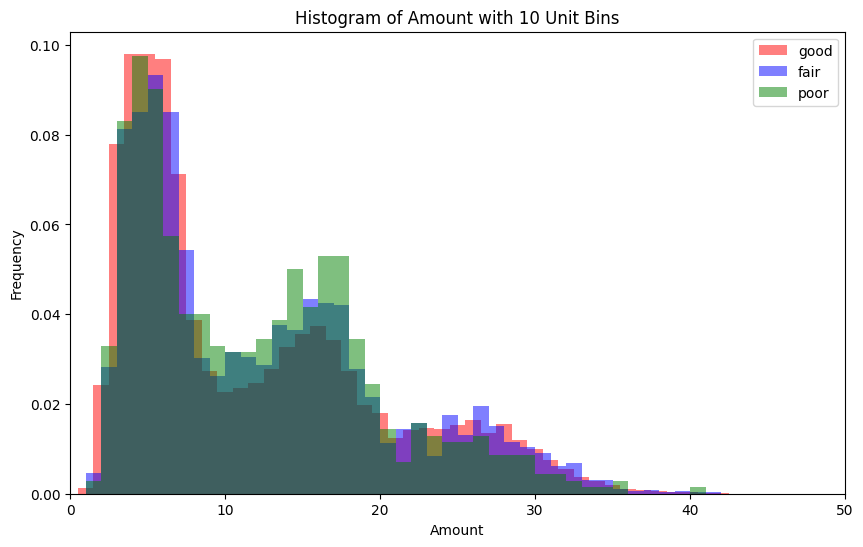

In [12]:
bin_width = 1
bins = list(range(-150, 800 + bin_width, bin_width))

# ヒストグラムデータを計算
good = np.histogram(train_data[train_data['health'] == 1]['tree_dbh'], density=True, bins=bins)
fair = np.histogram(train_data[train_data['health'] == 0]['tree_dbh'], density=True, bins=bins)
poor = np.histogram(train_data[train_data['health'] == 2]['tree_dbh'], density=True, bins=bins)
# プロット
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], good[0], width=bin_width, align='center', alpha=0.5, label='good', color='red')
plt.bar(bins[:-1], fair[0], width=bin_width, align='edge', alpha=0.5, label='fair', color='blue')
plt.bar(bins[:-1], poor[0], width=bin_width, align='edge', alpha=0.5, label='poor', color='green')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.title('Histogram of Amount with 10 Unit Bins')
plt.legend()
plt.show()

In [16]:
result = train_data.groupby('spc_common')['tree_dbh'].agg(['mean', 'median', 'var']).reset_index()
result.sample(10)

,spc_common,mean,median,var
90,purple-leaf plum,9.418367,7.0,43.700994
73,honeylocust,11.512573,10.0,56.292678
119,willow oak,10.548387,7.5,52.120571
11,Callery pear,9.905204,7.0,50.039378
101,silver birch,12.900000,14.5,16.988889
87,pine,10.600000,4.0,98.300000
26,Kentucky coffeetree,11.645833,10.0,59.297429
46,black walnut,6.666667,5.0,22.235294
50,catalpa,11.884615,8.0,67.146154
63,empress tree,12.000000,14.5,43.714286


In [20]:
train_data['spc_common'].value_counts()

spc_common
London planetree          2237
pin oak                   2140
cherry                    1689
Japanese zelkova          1470
littleleaf linden         1303
English oak               1277
green ash                 1089
Callery pear              1076
honeylocust               1034
Norway maple               634
Sophora                    545
ginkgo                     517
silver maple               422
American elm               407
American linden            336
red maple                  278
sweetgum                   219
silver linden              203
purple-leaf plum           196
Chinese elm                192
swamp white oak            183
maple                      165
crimson king maple         135
eastern redbud             116
'Schubert' chokecherry      98
Japanese tree lilac         93
crab apple                  90
dawn redwood                89
northern red oak            88
Siberian elm                81
willow oak                  62
sugar maple                 

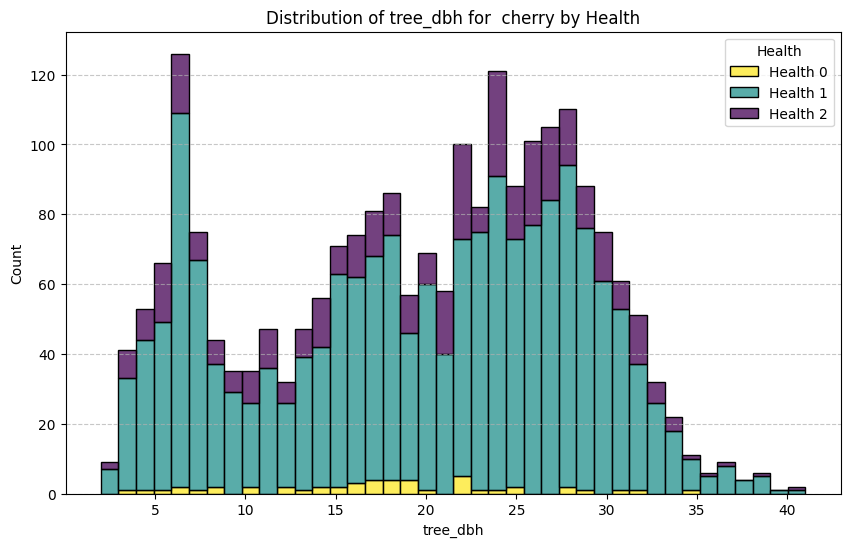

In [23]:
cherry_data = train_data[train_data['spc_common'] == 'London planetree']
# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=cherry_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  cherry by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

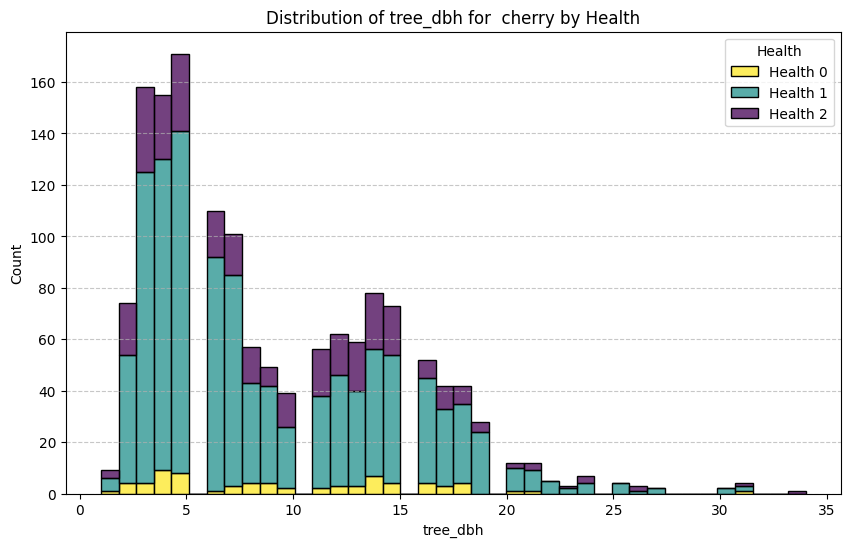

In [24]:
cherry_data = train_data[train_data['spc_common'] == 'Japanese zelkova']
# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=cherry_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  cherry by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [26]:
tree_dbh_avg= train_data.groupby("spc_common")['tree_dbh'].median()
train_data['user_amount_deviation'] = train_data['tree_dbh'] - train_data['spc_common'].map(tree_dbh_avg)

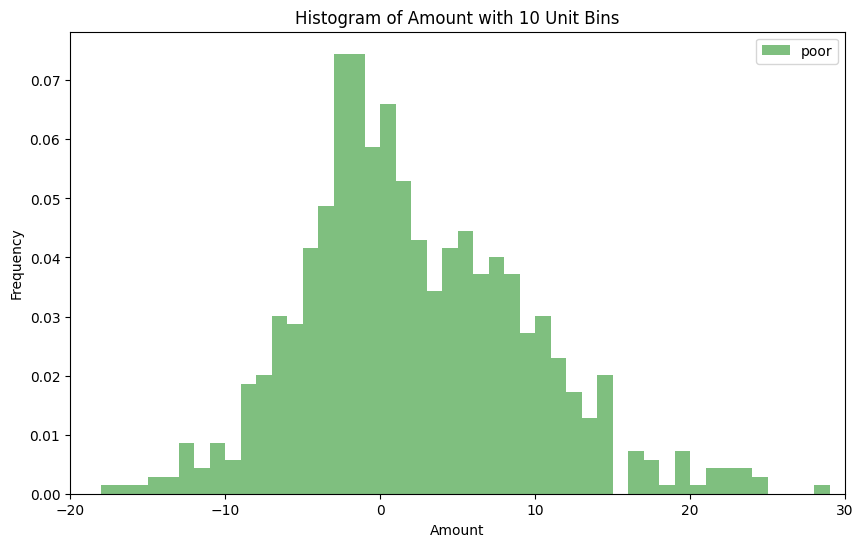

In [35]:
bin_width = 1
bins = list(range(-150, 800 + bin_width, bin_width))

# ヒストグラムデータを計算
good = np.histogram(train_data[train_data['health'] == 1]['user_amount_deviation'], density=True, bins=bins)
fair = np.histogram(train_data[train_data['health'] == 0]['user_amount_deviation'], density=True, bins=bins)
poor = np.histogram(train_data[train_data['health'] == 2]['user_amount_deviation'], density=True, bins=bins)
# プロット
plt.figure(figsize=(10, 6))
#plt.bar(bins[:-1], good[0], width=bin_width, align='center', alpha=0.5, label='good', color='red')
#plt.bar(bins[:-1], fair[0], width=bin_width, align='edge', alpha=0.5, label='fair', color='blue')
plt.bar(bins[:-1], poor[0], width=bin_width, align='edge', alpha=0.5, label='poor', color='green')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(-20, 30)
plt.title('Histogram of Amount with 10 Unit Bins')
plt.legend()
plt.show()

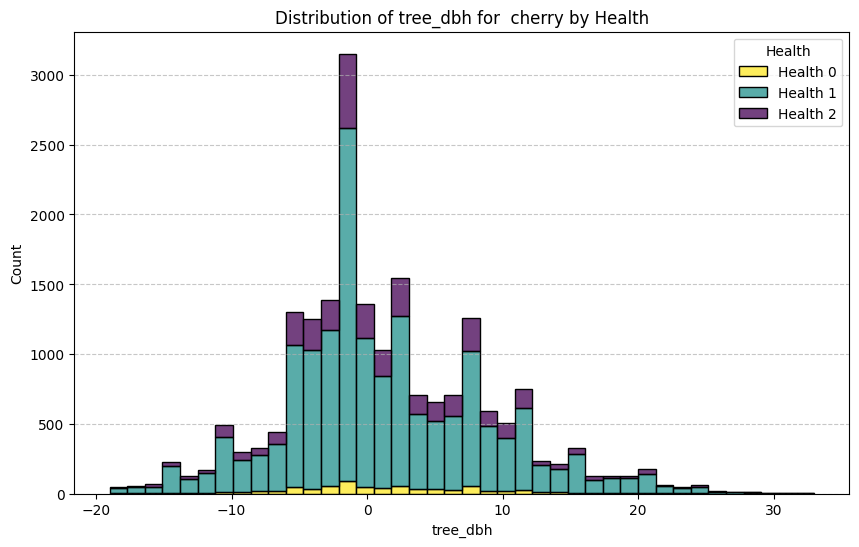

In [36]:

# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='user_amount_deviation', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  cherry by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

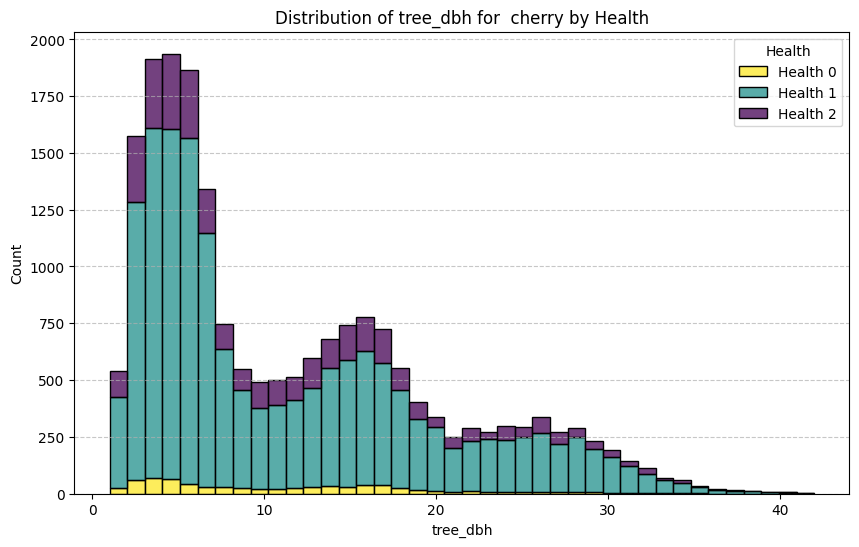

In [37]:

# ヒストグラムを作成（tree_dbhは数値型なので注意）
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tree_dbh', hue='health', multiple='stack',palette='viridis',bins=40)
plt.title('Distribution of tree_dbh for  cherry by Health')
plt.xlabel('tree_dbh')
plt.ylabel('Count')

# 凡例を表示
plt.legend(title='Health', loc='upper right', labels=['Health 0', 'Health 1', 'Health 2'])

# グリッドを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [40]:
train_data.isnull().sum()

Unnamed: 0                   0
created_at                   0
tree_dbh                     0
curb_loc                     0
health                       0
steward                  14883
guards                   14943
sidewalk                     0
user_type                    0
problems                 12243
spc_common                   0
spc_latin                    0
nta                          0
nta_name                     0
borocode                     0
boro_ct                      0
boroname                     0
zip_city                     0
cb_num                       0
st_senate                    0
st_assem                     0
cncldist                     0
user_amount_deviation        0
dtype: int64

In [44]:
both_null_rows = train_data[train_data['steward'].isnull() & train_data['guards'].isnull()&train_data['problems'].isnull()]

# どちらもnullである行の件数を取得
both_null_count = len(both_null_rows)

print("Both 'steward' and 'guards' are null in", both_null_count, "rows.")

Both 'steward' and 'guards' are null in 7323 rows.
